# **FOOD PRICES**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Understanding the data

In [6]:
df=pd.read_csv("/content/food_prices_ind - food_prices_ind.csv")
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62245,2017-12-15,Orissa,Cuttack,Cuttack,20.5,85.833333,vegetables and fruits,Onions,KG,actual,Retail,INR,43.29,0.6735
62246,2017-12-15,Orissa,Cuttack,Cuttack,20.5,85.833333,vegetables and fruits,Tomatoes,KG,actual,Retail,INR,31.5,0.4901
62247,2017-12-15,Orissa,Khordha,Bhubaneshwar,20.233333,85.833333,cereals and tubers,Potatoes,KG,actual,Retail,INR,9.59,0.1492
62248,2017-12-15,Orissa,Khordha,Bhubaneshwar,20.233333,85.833333,cereals and tubers,Rice,KG,actual,Retail,INR,25,0.389


In [7]:
df.drop([0],inplace=True)#droped 0 indexed row

In [8]:
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62245,2017-12-15,Orissa,Cuttack,Cuttack,20.5,85.833333,vegetables and fruits,Onions,KG,actual,Retail,INR,43.29,0.6735
62246,2017-12-15,Orissa,Cuttack,Cuttack,20.5,85.833333,vegetables and fruits,Tomatoes,KG,actual,Retail,INR,31.5,0.4901
62247,2017-12-15,Orissa,Khordha,Bhubaneshwar,20.233333,85.833333,cereals and tubers,Potatoes,KG,actual,Retail,INR,9.59,0.1492
62248,2017-12-15,Orissa,Khordha,Bhubaneshwar,20.233333,85.833333,cereals and tubers,Rice,KG,actual,Retail,INR,25,0.389


## problem statement

* The goal is to conduct an Exploratory Data Analysis (EDA) on the provided dataset containing food prices in various markets across India.

* This analysis will help understand the data structure, uncover patterns, identify anomalies, and summarize the main characteristics of the data.

* The dataset includes information on food prices collected from different markets in India.

## features

The dataset contains 168,496 entries and 14 columns. Here are the key features:

1. **date**: Date of the price recording.
2. **admin1**: The first-level administrative division (e.g., state or province).
3. **admin2**: The second-level administrative division (e.g., district).
4. **market**: Name of the market where the price was recorded.
5. **latitude**: Latitude of the market location.
6. **longitude**: Longitude of the market location.
7. **category**: Category of the commodity (e.g., cereals and tubers, miscellaneous food, oil and fats).
8. **commodity**: Specific commodity name (e.g., Rice, Sugar, Oil (mustard)).
9. **unit**: Unit of measurement (e.g., KG).
10. **priceflag**: Indicator of the price type (e.g., actual).
11. **pricetype**: Type of price (e.g., Retail).
12. **currency**: Currency of the recorded price (e.g., INR).
13. **price**: Price of the commodity in local currency.
14. **usdprice**: Price of the commodity in USD.

## target

target of this dataset is "price"

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62249 entries, 1 to 62249
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       62249 non-null  object
 1   admin1     61835 non-null  object
 2   admin2     61834 non-null  object
 3   market     62248 non-null  object
 4   latitude   61834 non-null  object
 5   longitude  61834 non-null  object
 6   category   62248 non-null  object
 7   commodity  62248 non-null  object
 8   unit       62248 non-null  object
 9   priceflag  62248 non-null  object
 10  pricetype  62248 non-null  object
 11  currency   62248 non-null  object
 12  price      62248 non-null  object
 13  usdprice   62248 non-null  object
dtypes: object(14)
memory usage: 6.6+ MB


In [10]:
df.shape

(62249, 14)

In [11]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1976


In [14]:
df.tail()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
62245,2017-12-15,Orissa,Cuttack,Cuttack,20.5,85.833333,vegetables and fruits,Onions,KG,actual,Retail,INR,43.29,0.6735
62246,2017-12-15,Orissa,Cuttack,Cuttack,20.5,85.833333,vegetables and fruits,Tomatoes,KG,actual,Retail,INR,31.5,0.4901
62247,2017-12-15,Orissa,Khordha,Bhubaneshwar,20.233333,85.833333,cereals and tubers,Potatoes,KG,actual,Retail,INR,9.59,0.1492
62248,2017-12-15,Orissa,Khordha,Bhubaneshwar,20.233333,85.833333,cereals and tubers,Rice,KG,actual,Retail,INR,25,0.389
62249,2017-12-15,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.dtypes

,0
date,object
admin1,object
admin2,object
market,object
latitude,object
longitude,object
category,object
commodity,object
unit,object
priceflag,object


In [16]:
#converting object into float
df["latitude"]=df["latitude"].astype(float)
df["longitude"]=df["longitude"].astype(float)
df["price"]=df["price"].astype(float)
df["usdprice"]=df["usdprice"].astype(float)

In [17]:
#changing date format
df['date'] = pd.to_datetime(df['date'])

In [18]:
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.00,0.2550
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.50,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.00,0.9880
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.80,0.2167
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.20,0.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62245,2017-12-15,Orissa,Cuttack,Cuttack,20.500000,85.833333,vegetables and fruits,Onions,KG,actual,Retail,INR,43.29,0.6735
62246,2017-12-15,Orissa,Cuttack,Cuttack,20.500000,85.833333,vegetables and fruits,Tomatoes,KG,actual,Retail,INR,31.50,0.4901
62247,2017-12-15,Orissa,Khordha,Bhubaneshwar,20.233333,85.833333,cereals and tubers,Potatoes,KG,actual,Retail,INR,9.59,0.1492
62248,2017-12-15,Orissa,Khordha,Bhubaneshwar,20.233333,85.833333,cereals and tubers,Rice,KG,actual,Retail,INR,25.00,0.3890


In [19]:
df.dtypes

,0
date,datetime64[ns]
admin1,object
admin2,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


# 2) Cleaning the data

In [20]:
df.isnull().sum()
#it finds null values

,0
date,0
admin1,414
admin2,415
market,1
latitude,415
longitude,415
category,1
commodity,1
unit,1
priceflag,1


In [21]:
#fill columns with missing values ..if the data is object fill it with mode,if the data is float/int fill it with median/mean
#mode
x=df["admin1"].mode()[0]
df["admin1"].fillna(x,inplace=True)

<ipython-input-21-37e80e02d8a0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["admin1"].fillna(x,inplace=True)


In [22]:
x=df["admin2"].mode()[0]
df["admin2"].fillna(x,inplace=True)

<ipython-input-22-831dec346e05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["admin2"].fillna(x,inplace=True)


In [23]:
#fill columns with missing values ..if the data is object fill it with mode,if the data is float/int fill it with median/mean
#median
df['latitude'].fillna(df['latitude'].median(),inplace=True)
df['longitude'].fillna(df["longitude"].median(),inplace=True)

<ipython-input-23-e8d448623e8e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['latitude'].fillna(df['latitude'].median(),inplace=True)
<ipython-input-23-e8d448623e8e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [24]:
df.isnull().sum()

,0
date,0
admin1,0
admin2,0
market,1
latitude,0
longitude,0
category,1
commodity,1
unit,1
priceflag,1


# 3) Descriptive statistics

In [25]:
df.describe()

,date,latitude,longitude,price,usdprice
count,62249,62249.000000,62249.000000,62248.000000,62248.000000
mean,2013-04-19 02:32:35.077190144,22.587154,80.067485,96.030513,1.688449
min,1994-01-15 00:00:00,8.506944,70.783333,2.500000,0.056700
25%,2012-08-15 00:00:00,18.975000,76.283333,19.170000,0.341800
50%,2014-12-15 00:00:00,23.350000,77.950000,36.980000,0.615500
75%,2016-07-15 00:00:00,26.850000,85.116667,81.390000,1.315475
max,2017-12-15 00:00:00,31.716667,94.116667,4066.070000,88.773000
std,NaN,6.307970,5.920793,295.516985,5.423466


In [26]:
#to check the unknown values in the columns
for column in df.columns:
  print("value count for",column)
  print(df[column].value_counts())
  print('_',40)

value count for date
date
2016-12-15    921
2016-11-15    920
2017-08-15    920
2017-04-15    919
2016-08-15    911
             ... 
1995-01-15     12
1995-07-15     11
1995-02-15     11
1995-08-15     11
1995-03-15     10
Name: count, Length: 288, dtype: int64
_ 40
value count for admin1
admin1
Maharashtra            4987
Uttar Pradesh          4217
Tamil Nadu             4039
Orissa                 3949
Madhya Pradesh         3745
Rajasthan              3396
Bihar                  3259
Haryana                3089
Kerala                 2980
Gujarat                2790
Punjab                 2755
Delhi                  2398
West Bengal            2343
Karnataka              2171
Himachal Pradesh       2126
Telangana              1555
Meghalaya              1423
Assam                  1341
Tripura                1198
Chandigarh             1059
Jharkhand              1018
Andhra Pradesh         1000
Mizoram                 984
Uttarakhand             982
Nagaland                960
Pu

#4) Data visualization

In [27]:
for x in df.columns:
  print("nunique",x)
  print(df[x].nunique())

  print(" ")

nunique date
288
 
nunique admin1
29
 
nunique admin2
56
 
nunique market
58
 
nunique latitude
56
 
nunique longitude
54
 
nunique category
6
 
nunique commodity
23
 
nunique unit
3
 
nunique priceflag
1
 
nunique pricetype
2
 
nunique currency
1
 
nunique price
10395
 
nunique usdprice
18456
 


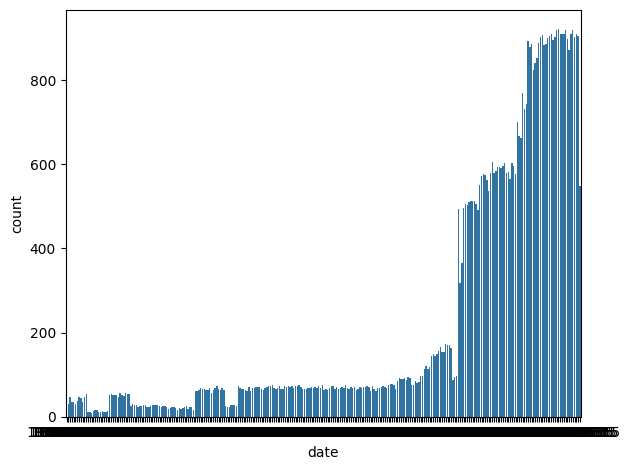

In [28]:
#plotting the qualitative features as countplot:-  (if dtype is object it is qualitative)
sns.countplot(x="date",data=df)
plt.tight_layout()

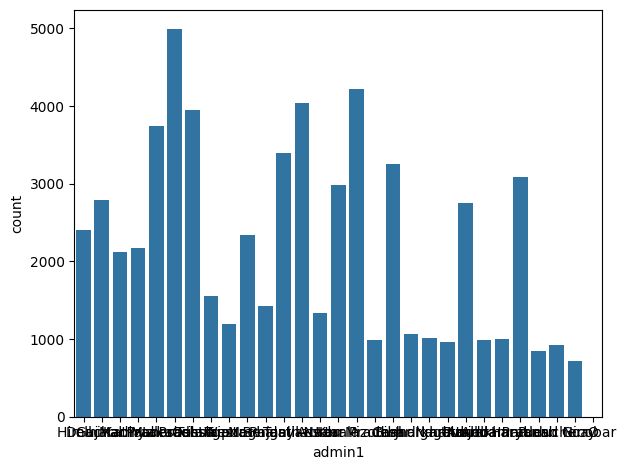

In [29]:
sns.countplot(x="admin1",data=df)
plt.tight_layout()

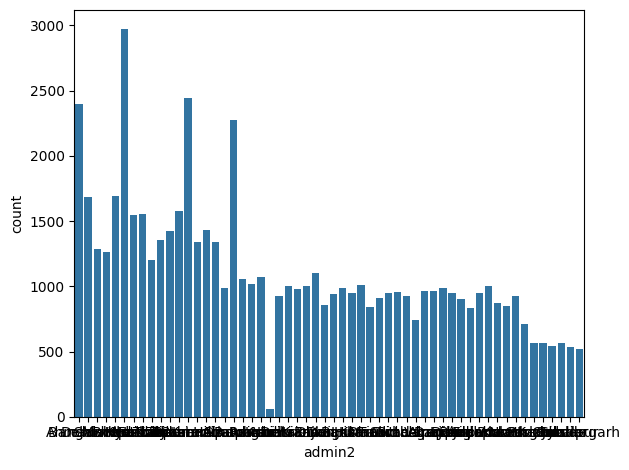

In [30]:
sns.countplot(x="admin2",data=df)
plt.tight_layout()

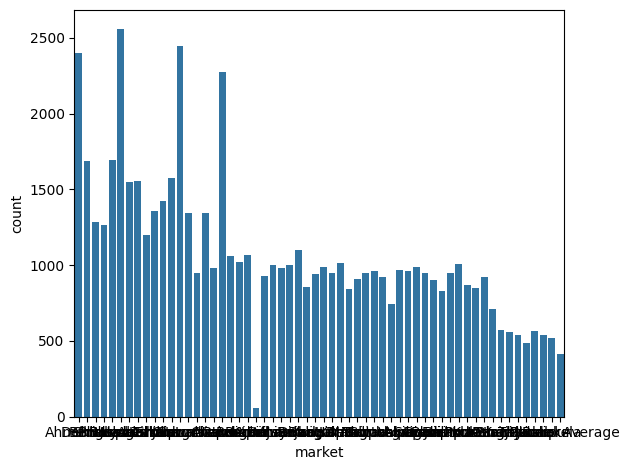

In [31]:
sns.countplot(x="market",data=df)
plt.tight_layout()

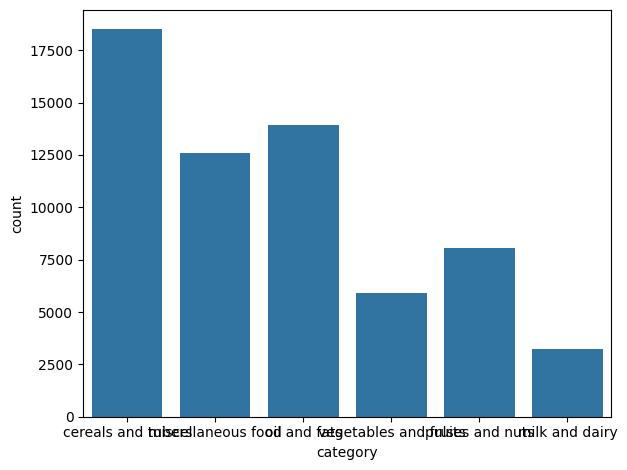

In [32]:
sns.countplot(x="category",data=df)
plt.tight_layout()

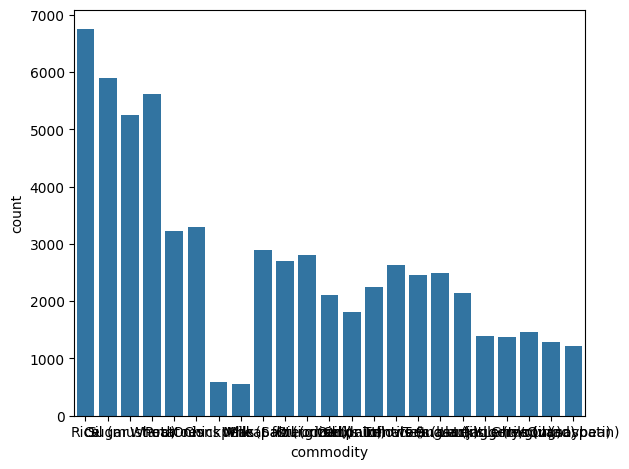

In [33]:
sns.countplot(x="commodity",data=df)
plt.tight_layout()

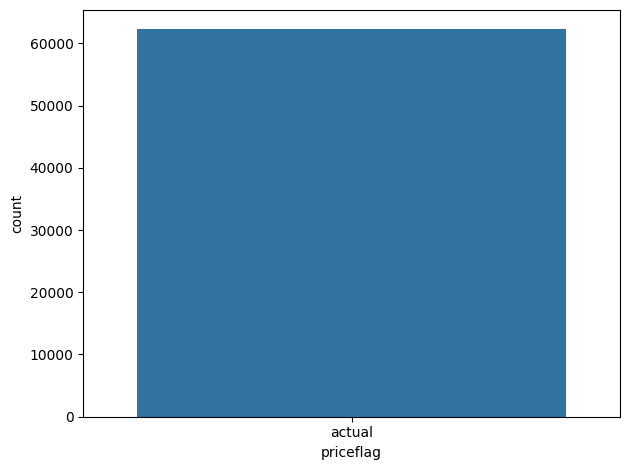

In [34]:
sns.countplot(x="priceflag",data=df)
plt.tight_layout()

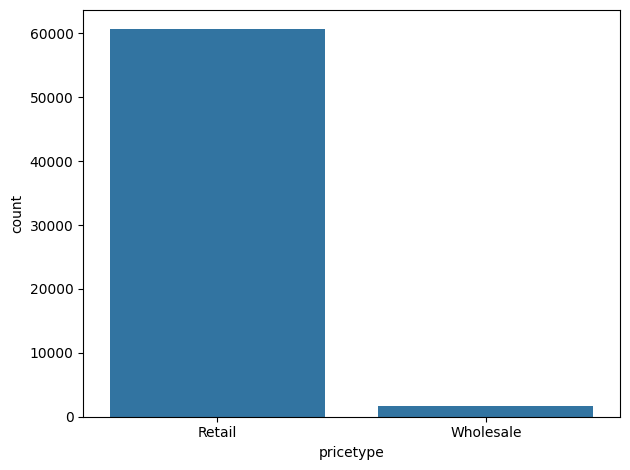

In [35]:
sns.countplot(x="pricetype",data=df)
plt.tight_layout()

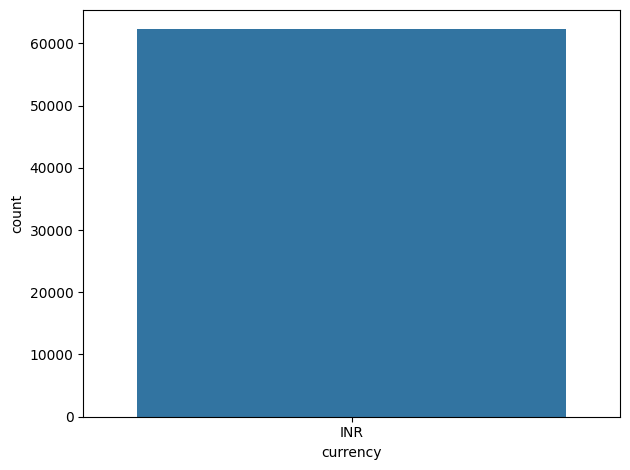

In [36]:
sns.countplot(x="currency",data=df)
plt.tight_layout()

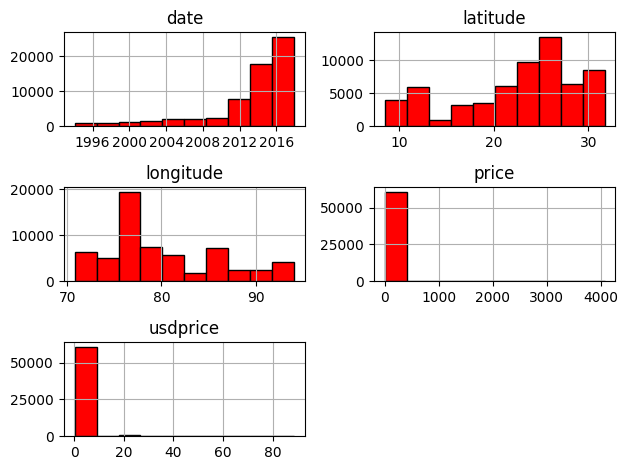

In [37]:
#plotting quantitative features as histograms   (if dtype is float, it is quantitative)
df.hist(color="red",ec="black")
plt.tight_layout()

# 5) Correlation analysis

In [38]:
#converting all strings to numerical values using labelencorder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['admin1'] = labelencoder.fit_transform(df['admin1'])
df['admin2'] = labelencoder.fit_transform(df['admin2'])
df['market'] = labelencoder.fit_transform(df['market'])
df['category']=labelencoder.fit_transform(df['category'])
df['commodity']=labelencoder.fit_transform(df['commodity'])
df['unit'] = labelencoder.fit_transform(df['unit'])
df['priceflag'] = labelencoder.fit_transform(df['priceflag'])
df['pricetype']=labelencoder.fit_transform(df['pricetype'])
df['currency']=labelencoder.fit_transform(df['currency'])

In [39]:
# Displaying whether the data has converted into numeric
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,5,17,14,28.666667,77.216667,0,15,1,0,0,0,8.00,0.2550
2,1994-01-15,5,17,14,28.666667,77.216667,2,17,1,0,0,0,13.50,0.4303
3,1994-01-15,5,17,14,28.666667,77.216667,3,9,1,0,0,0,31.00,0.9880
4,1994-01-15,7,1,2,23.033333,72.616667,0,15,1,0,0,0,6.80,0.2167
5,1994-01-15,7,1,2,23.033333,72.616667,0,21,1,0,0,0,6.20,0.1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62245,2017-12-15,19,14,12,20.500000,85.833333,5,13,1,0,0,0,43.29,0.6735
62246,2017-12-15,19,14,12,20.500000,85.833333,5,20,1,0,0,0,31.50,0.4901
62247,2017-12-15,19,33,9,20.233333,85.833333,0,14,1,0,0,0,9.59,0.1492
62248,2017-12-15,19,33,9,20.233333,85.833333,0,15,1,0,0,0,25.00,0.3890


In [40]:
df.shape

(62249, 14)

In [41]:
df.drop(columns=["priceflag","currency"],inplace=True)
# because priceflag and currency columns have only one value

In [42]:
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,price,usdprice
1,1994-01-15,5,17,14,28.666667,77.216667,0,15,1,0,8.00,0.2550
2,1994-01-15,5,17,14,28.666667,77.216667,2,17,1,0,13.50,0.4303
3,1994-01-15,5,17,14,28.666667,77.216667,3,9,1,0,31.00,0.9880
4,1994-01-15,7,1,2,23.033333,72.616667,0,15,1,0,6.80,0.2167
5,1994-01-15,7,1,2,23.033333,72.616667,0,21,1,0,6.20,0.1976
...,...,...,...,...,...,...,...,...,...,...,...,...
62245,2017-12-15,19,14,12,20.500000,85.833333,5,13,1,0,43.29,0.6735
62246,2017-12-15,19,14,12,20.500000,85.833333,5,20,1,0,31.50,0.4901
62247,2017-12-15,19,33,9,20.233333,85.833333,0,14,1,0,9.59,0.1492
62248,2017-12-15,19,33,9,20.233333,85.833333,0,15,1,0,25.00,0.3890


In [43]:
df.shape

(62249, 12)

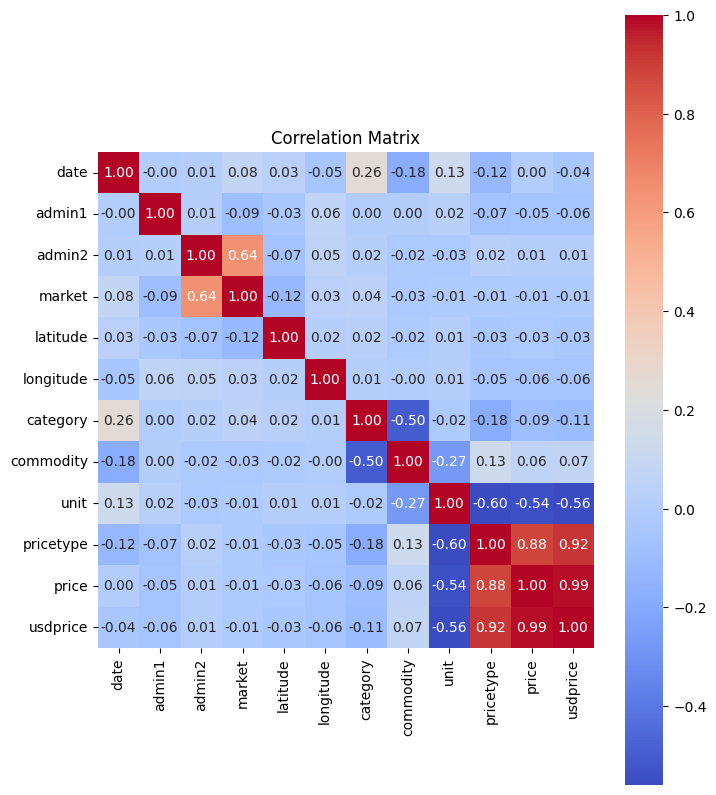

In [44]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(8,10))

# Heatmap of correlation matrix
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(corr_matrix,annot=True, fmt='0.2f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True) # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

In [45]:
corr_matrix

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,price,usdprice
date,1.000000,-0.000354,0.006988,0.075778,0.033146,-0.047910,0.255186,-0.183674,0.132385,-0.122458,0.000344,-0.039870
admin1,-0.000354,1.000000,0.014184,-0.090535,-0.034383,0.061675,0.000247,0.003754,0.024767,-0.067080,-0.054463,-0.055323
admin2,0.006988,0.014184,1.000000,0.643389,-0.070688,0.050084,0.016924,-0.021441,-0.025974,0.020585,0.011687,0.011979
market,0.075778,-0.090535,0.643389,1.000000,-0.118243,0.033809,0.038939,-0.026397,-0.011649,-0.012682,-0.011961,-0.014223
latitude,0.033146,-0.034383,-0.070688,-0.118243,1.000000,0.018721,0.021171,-0.016067,0.011831,-0.029904,-0.029518,-0.031669
longitude,-0.047910,0.061675,0.050084,0.033809,0.018721,1.000000,0.007555,-0.001156,0.008497,-0.051249,-0.059441,-0.059336
category,0.255186,0.000247,0.016924,0.038939,0.021171,0.007555,1.000000,-0.502021,-0.020260,-0.183174,-0.091872,-0.107693
commodity,-0.183674,0.003754,-0.021441,-0.026397,-0.016067,-0.001156,-0.502021,1.000000,-0.267685,0.131728,0.060369,0.071510
unit,0.132385,0.024767,-0.025974,-0.011649,0.011831,0.008497,-0.020260,-0.267685,1.000000,-0.598363,-0.541365,-0.559635
pricetype,-0.122458,-0.067080,0.020585,-0.012682,-0.029904,-0.051249,-0.183174,0.131728,-0.598363,1.000000,0.883615,0.915435


In [46]:
#droping the feautures whose correlation is zero
df.drop(columns=["date","admin2","market","commodity"],inplace=True)

In [47]:
df.shape

(62249, 8)

## skewed data

In [48]:
df.skew()

,0
admin1,-0.050807
latitude,-0.611114
longitude,0.813226
category,0.077859
unit,0.946094
pricetype,5.986323
price,7.699564
usdprice,7.327760


In [49]:
df['unit'] = np.log1p(df['unit'])
df['pricetype'] = np.log1p(df["pricetype"])
df['price'] = np.log1p(df['price'])
df['usdprice'] = np.log1p(df["usdprice"])

In [50]:
df.skew()

,0
admin1,-0.050807
latitude,-0.611114
longitude,0.813226
category,0.077859
unit,-1.748241
pricetype,5.979171
price,1.072482
usdprice,3.293331


# 6)Outlier detection

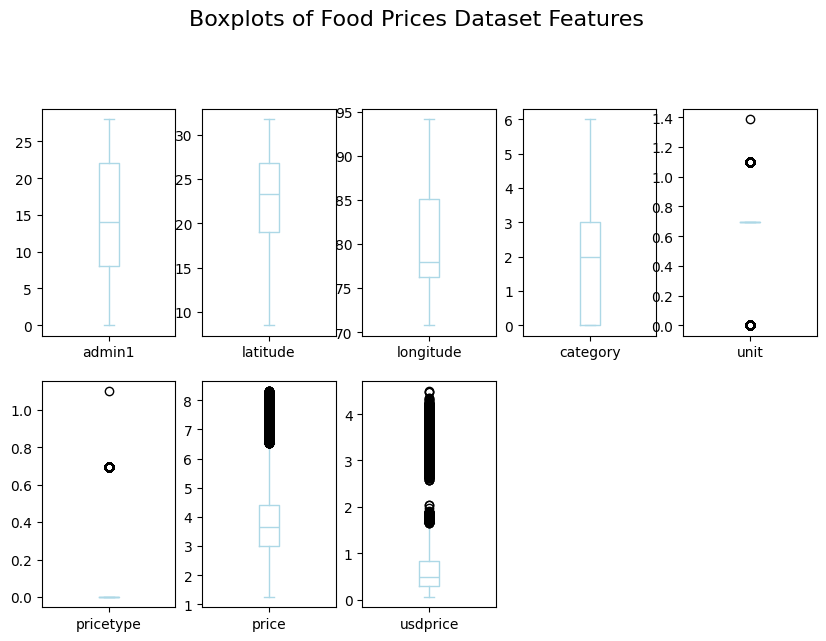

In [51]:
#visual detection of outliers using a boxplot

df.plot(kind='box', subplots=True, layout=(3,5), figsize=(10,10),
color='lightblue')
plt.suptitle('Boxplots of Food Prices Dataset Features', fontsize=16)
plt.show()

In [52]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]


# Optionally, reset the index
df.reset_index(drop=True, inplace=True)

In [53]:
Q1 = df['usdprice'].quantile(0.25)
Q3 = df['usdprice'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df = df[(df['usdprice'] >= (Q1 - 1.5 * IQR)) & (df['usdprice'] <= (Q3 + 1.5 * IQR))]


# Optionally, reset the index
df.reset_index(drop=True, inplace=True)

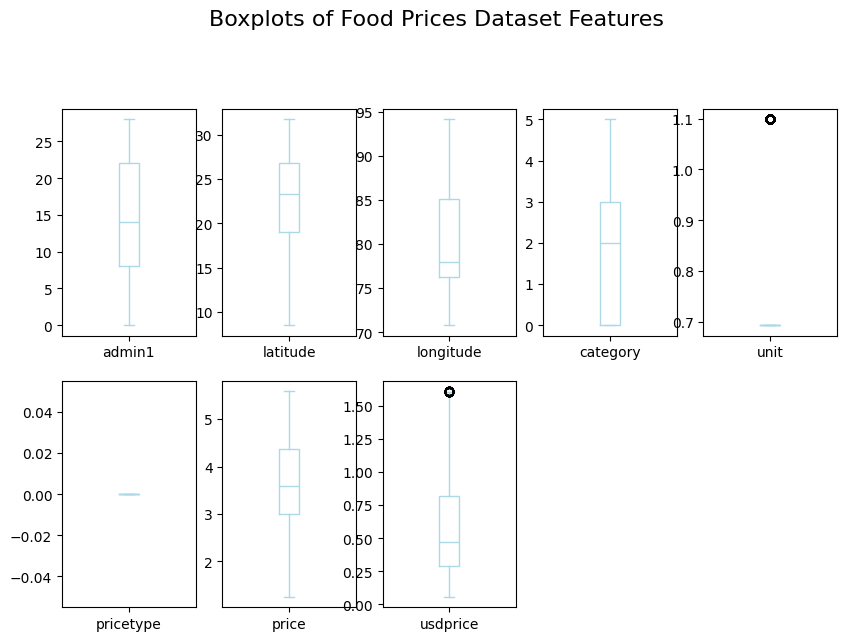

In [54]:
#visual detection of outliers using a boxplot

df.plot(kind='box', subplots=True, layout=(3,5), figsize=(10,10),
color='lightblue')
plt.suptitle('Boxplots of Food Prices Dataset Features', fontsize=16)
plt.show()

# 8) Dimensionality reduction

## PCA method

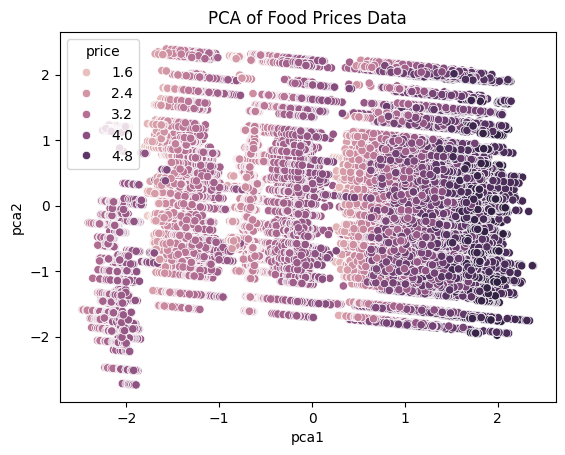

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ["admin1","latitude","longitude","category","unit","pricetype","usdprice"]
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results/
sns.scatterplot(x='pca1', y='pca2', hue='price', data=df)
plt.title('PCA of Food Prices Data')
plt.show()

# 9) Data scaling

## standardization and normalisation

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0,std=1)
scaler = StandardScaler()
df[["admin1","latitude","longitude","category","unit","pricetype","price","usdprice"]] = scaler.fit_transform(df[["admin1","latitude","longitude","category","unit","pricetype","price","usdprice"]])


# Normalization (scaling to 0-1 range)
#minmax_scaler = MinMaxScaler()
#df[["admin1","latitude","longitude","category","unit","pricetype","price","usdprice"]] = minmax_scaler.fit_transform(df[["admin1","latitude","longitude","category","unit","pricetype","price","usdprice"]])



# 10) Initial modeling and hypothesis testing

## baseline model

In [57]:
df

,admin1,latitude,longitude,category,unit,pricetype,price,usdprice,pca1,pca2
0,-1.258803,0.957734,-0.487851,-1.297732,-0.238677,0.0,-1.772008,-1.023318,-1.470143,-0.924951
1,-1.258803,0.957734,-0.487851,-0.102917,-0.238677,0.0,-1.191495,-0.626343,-0.395727,-1.026640
2,-1.258803,0.957734,-0.487851,0.494490,-0.238677,0.0,-0.227975,0.373301,0.660177,-1.148616
3,-1.006754,0.065845,-1.262256,-1.297732,-0.238677,0.0,-1.946190,-1.117419,-1.558556,-1.316769
4,-1.006754,0.065845,-1.262256,-1.297732,-0.238677,0.0,-2.043618,-1.165460,-1.589659,-1.312504
...,...,...,...,...,...,...,...,...,...,...
60370,0.505544,-0.335241,0.962755,1.091897,-0.238677,0.0,0.460125,0.172378,0.957979,0.971181
60371,0.505544,-0.335241,0.962755,1.689305,-0.238677,0.0,0.167643,-0.149564,1.158242,0.966543
60372,0.505544,-0.335241,0.962755,1.689305,-0.238677,0.0,-0.209103,-0.501984,0.930073,0.997833
60373,0.505544,-0.377461,0.962755,-1.297732,-0.238677,0.0,-1.573987,-1.290712,-1.624415,1.232197


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LinearRegression

In [59]:
# Features and target variable
X = df[["admin1","latitude","longitude","category","unit","pricetype","usdprice"]]
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Predict target variable for the test data
y_pred = model.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 0.07262499157769003
R-squared: 0.9270131153878057


## DecisionTree Regressor

In [60]:
# Features and target variable
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
X = df[["admin1","latitude","longitude","category","unit","pricetype","usdprice"]]
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the linear regression model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)
# Predict target variable for the test data
y_pred = model.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 0.03060097591094204
R-squared: 0.969246538287812


# 11) Documentation and Reporting

## summarize findings and prepare data for modelling

In [61]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with price': df.corr()['price'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

# Prepare final dataset for modeling
final_df = df[["admin1","latitude","longitude","category","unit","pricetype","usdprice","price"]]

EDA Summary:
Dataset Shape: (60375, 10)
Missing Values: 0
Correlation with price: price        1.000000
usdprice     0.959313
pca1         0.769667
category     0.454732
longitude   -0.003593
admin1      -0.007789
unit        -0.010830
latitude    -0.014134
pca2        -0.112103
pricetype         NaN
Name: price, dtype: float64
